In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib import cm
import datetime

In [7]:
##Exploratory Data Analysis

In [8]:
#import data
df1 = pd.read_csv('USvideos.csv')

In [9]:
#understanding data, it shows there are 16 variables and there are 40949 observations, 
#and noticed there are some data missing in the 'description'
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [10]:
#fill in the missing values in 'description' with null
df1['description'] = df1['description'].fillna('NULL')

In [11]:
# look at the first five rows and observe a handful of columns provide ancillary info
df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [12]:
# drop videos with same video_id, since it's a duplicate
df1.drop_duplicates()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NULL
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [14]:
#calculate the mean of views, likes, dislikes, and comment_count
df1[['views', 'likes', 'dislikes', 'comment_count']].agg('mean')

views            2.360785e+06
likes            7.426670e+04
dislikes         3.711401e+03
comment_count    8.446804e+03
dtype: float64

In [15]:
df1.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [16]:
# data cleaning
df1['tags'] = df1['tags'].apply(lambda x: x.replace('|',' ').replace('"',""))

In [17]:
#import json file and find corresponding categories
df_category= pd.read_json('US_category_id.json')
df_category.head
df_category = pd.json_normalize(df_category['items'])

In [18]:
#obtain category names corresponds to category ids
df_category['id'] = pd.to_numeric(df_category['id'])
df1=df1.merge(df_category,how='inner', left_on='category_id', right_on='id')
df1

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,...,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,...,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False


In [19]:
df_renamed = df1.rename(columns={'snippet.title': 'category'})
df_renamed

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,category,snippet.assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,...,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,...,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False


In [20]:
df = df_renamed.drop(columns= ['kind', 'etag', 'snippet.channelId', 'snippet.assignable'], axis = 1)
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,cute cats thai eggs,98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,shawn johnson andrew east shawn east shawn and...,321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week ...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,18.02.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,608,1644,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40945,V6ElE2xs48c,18.03.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,610,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40946,V6ElE2xs48c,18.04.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,615,1648,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows
40947,V6ElE2xs48c,18.05.06,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,43,2018-05-10T21:01:22.000Z,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,615,1649,https://i.ytimg.com/vi/V6ElE2xs48c/default.jpg,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows


In [21]:
#select the numeric column
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['category_id' 'views' 'likes' 'dislikes' 'comment_count' 'id']


In [22]:
#Fix data format for numeric column
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [23]:
#select the non-numeric column
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['video_id' 'trending_date' 'title' 'channel_title' 'category_id'
 'publish_time' 'tags' 'thumbnail_link' 'comments_disabled'
 'ratings_disabled' 'video_error_or_removed' 'description' 'category']


In [24]:
#format date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [25]:
#format time
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-04-21 06:47:32
2   2017-11-11 15:00:03
3   2017-11-11 18:08:04
4   2017-11-11 01:19:33
Name: publish_time, dtype: datetime64[ns]

In [26]:
#divide the date and time in seperate column
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-04-21,06:47:32
2,2017-11-11,15:00:03
3,2017-11-11,18:08:04
4,2017-11-11,01:19:33


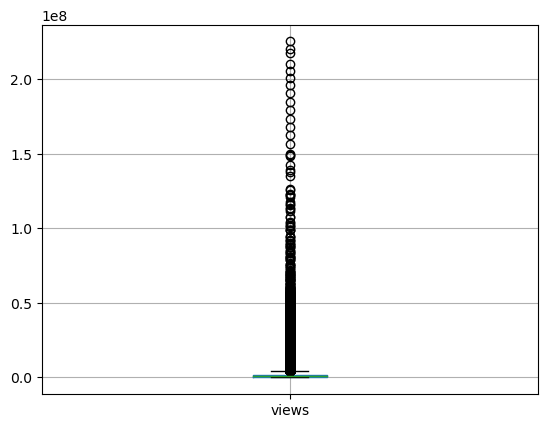

In [27]:
#find outlier
df.boxplot(column=['views'])
plt.show()
#no outlier shown

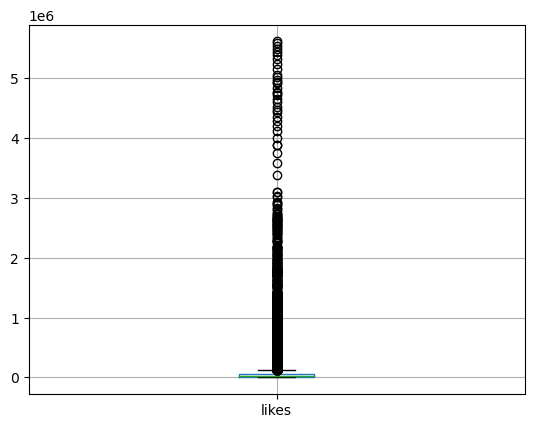

In [28]:
df.boxplot(column=['likes'])
plt.show()

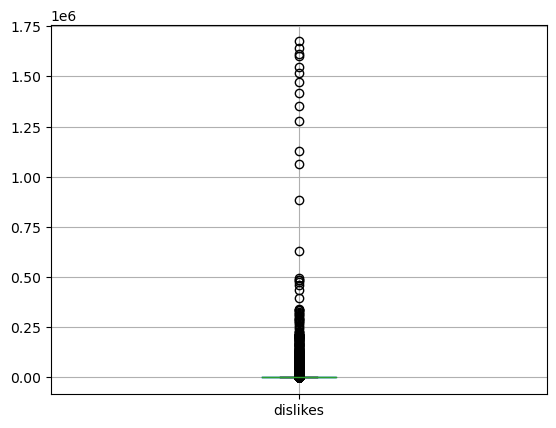

In [29]:
df.boxplot(column=['dislikes'])
plt.show()

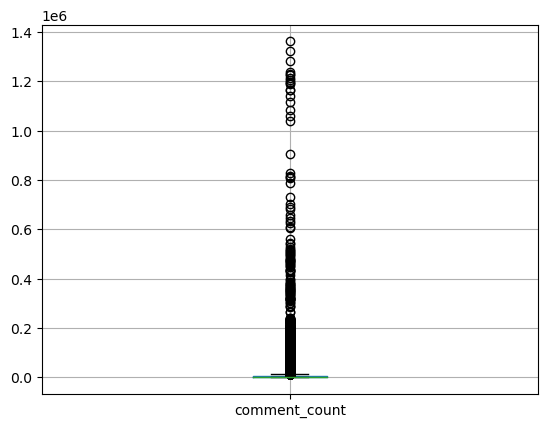

In [30]:
df.boxplot(column=['comment_count'])
plt.show()

In [31]:
#No obvious outlier in the numerical column

In [32]:
#we want to see if there's outlier in categorical column
df['category_id'].describe()
#no outlier shown

count     40949
unique       16
top          24
freq       9964
Name: category_id, dtype: object

In [33]:
#check for duplicates
df.isna().sum()
#no duplicates shown

video_id                  0
trending_date             0
title                     0
channel_title             0
publish_date              0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
id                        0
category                  0
dtype: int64

In [34]:
## Data Analysis: Visualization

In [35]:
#Visualizing numerical data using heatmap
#obtain matrix only contains numerical columns
numeric = ['views', 'likes', 'dislikes', 'comment_count']
matrix_numeric = df[numeric].corr()
matrix_numeric

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/2659667256.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, minor=False)
/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/2659667256.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, minor=False)


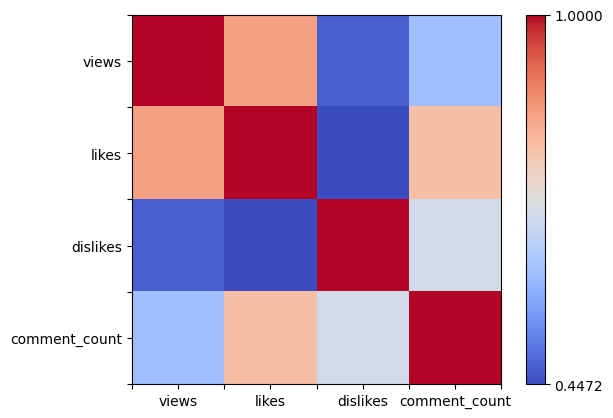

In [36]:
#plot in heat map
fig, ax = plt.subplots()
heatmap = ax.imshow(matrix_numeric, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = matrix_numeric.min().min()
cbar_max = matrix_numeric.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in numeric:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

#from the heatmap, we noticed that views is strongly correlated with likes, dislikes, and comment_count

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/2102889240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47))


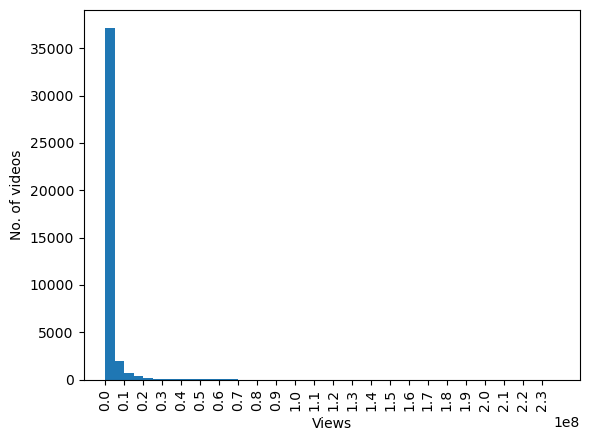

In [37]:
#construct histogram for 'views' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47))
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)
plt.show()

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/1107766891.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["views"]<=5e7]["likes"], kde = False, hist_kws={'alpha':1})


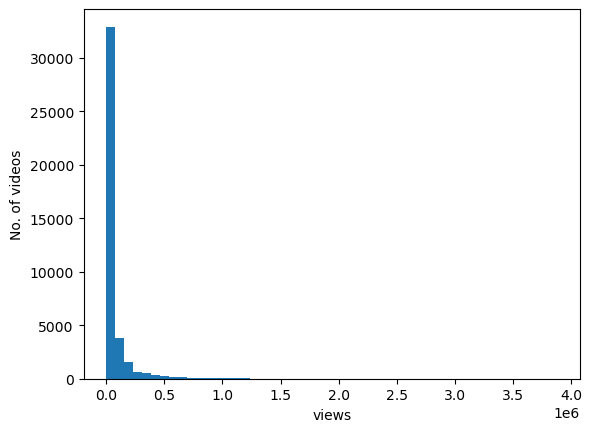

In [38]:
#we noticed that most trending videos have views between 0 and 100000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["views"]<=5e7]["likes"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "views", ylabel = "No. of videos")
plt.show()

In [39]:
#take a look at the proportion of the videos which have views between 1 to 100000000
df[df['views'] < 1e8]['views'].count() / df['views'].count() * 100

99.90231751691128

In [40]:
#take a look at the proportion of the videos which have views between 1 to 10000000
df[df['views'] < 1e7]['views'].count() / df['views'].count() * 100

95.48706928130113

In [41]:
#we conclude that 95% of the trending videos have views between 0 to 10000000

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/3279190821.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["likes"], kde=False,


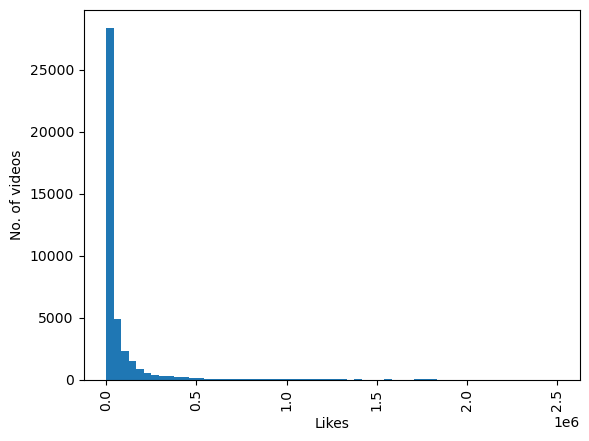

In [42]:
#construct histogram for 'likes' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2.5e6, 61))
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)
plt.show()

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/1011097673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["likes"]<=1e6]["likes"], kde = False, hist_kws={'alpha':1})


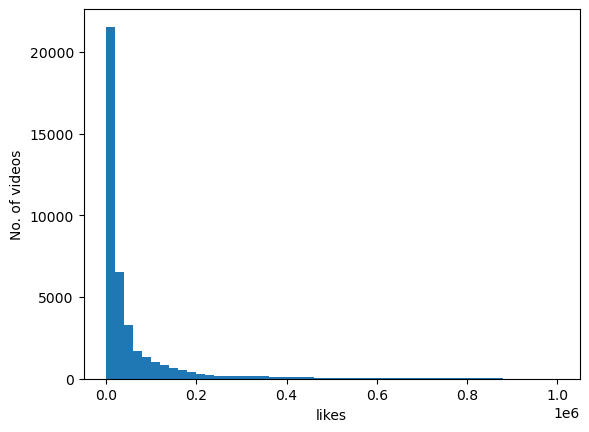

In [43]:
#we noticed that most trending videos have likes between 0 and 1000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["likes"]<=1e6]["likes"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "likes", ylabel = "No. of videos")
plt.show()

In [44]:
#from above, we noticed that most trending videos have likes between 0 to 400000 likes, so we want to see some proportions here
df[df['likes'] < 4e5]['likes'].count() / df['likes'].count() * 100

96.58111309189479

In [45]:
#also take a look at the total proportion of the videos within 1000000 likes
df[df['likes'] < 1e6]['likes'].count() / df['likes'].count() * 100

99.09887909350655

In [46]:
#we conclude that the majority of trending videos have likes within 1000000 likes

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/625666929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["comment_count"], kde=False,


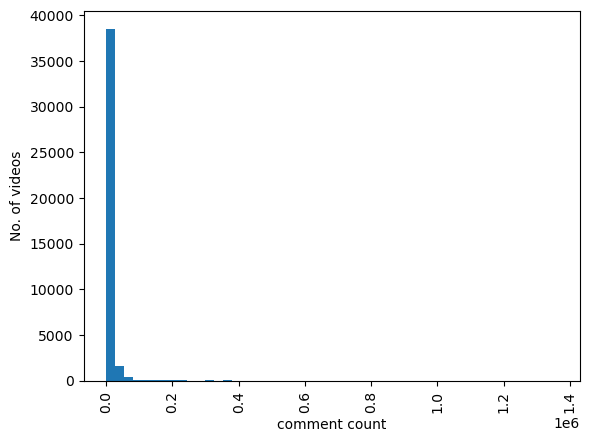

In [47]:
#construct histogram for 'comment_count' and take a look at the distribution
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, 
                 hist_kws={'alpha': 1})
_ = ax.set(xlabel="comment count", ylabel="No. of videos")
_ = plt.xticks(rotation=90)
plt.show()

In [48]:
#we noticed that most trending videos have likes between 0 and 200000. Let's look closer at the data within that range

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/3814745854.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["comment_count"]<=200000]["comment_count"], kde = False, hist_kws={'alpha':1})


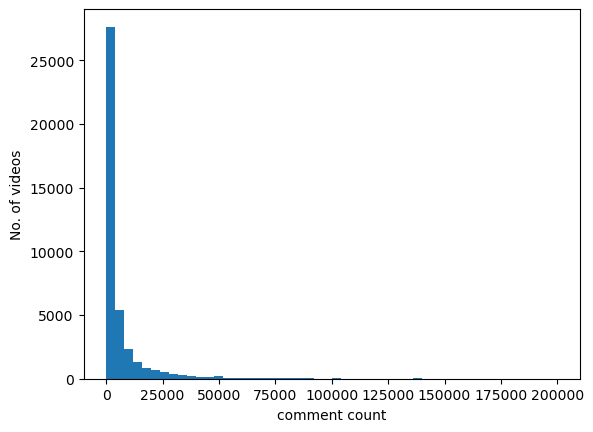

In [49]:
fig, ax = plt.subplots()
_=sns.distplot(df[df["comment_count"]<=200000]["comment_count"], kde = False, hist_kws={'alpha':1})
_=ax.set(xlabel = "comment count", ylabel = "No. of videos")
plt.show()

In [50]:
#from the graph, we see that most trending videos have comment count between 0 to 37500, let take a look at the proportion
df[df['comment_count'] < 37500]['comment_count'].count() / df['comment_count'].count() 

0.96202593469926

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/2589394245.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df[df["comment_count"]==0]["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2e8, 47))


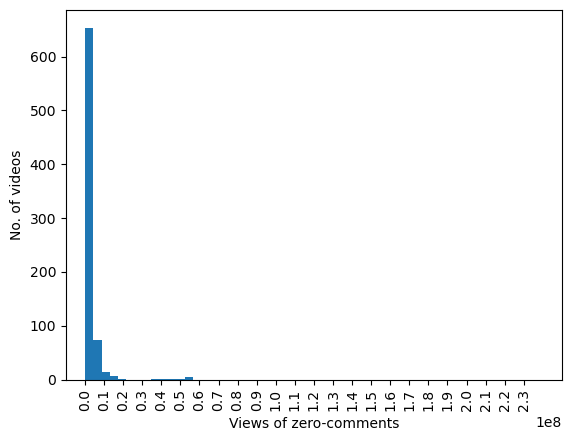

In [51]:
#another thing we want to look at is that for the videos with 0 comment as well as comment disabled
#we want to analyze their views
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"]==0]["views"], kde=False, hist_kws={'alpha': 1}, bins=np.linspace(0, 2e8, 47))
_ = ax.set(xlabel="Views of zero-comments", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)
plt.show()

/var/folders/51/jd7syg8x2bn_3xlw6r9l9bjh0000gn/T/ipykernel_33485/3430875098.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df[df["comment_count"]==0]["views"], kde = False, hist_kws={'alpha':1}, ax = ax)


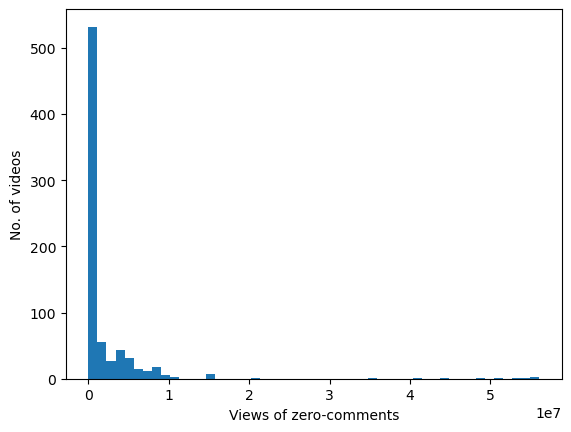

In [52]:
#we noticed that most trending videos have 0 comment between 0 and 1000000. Let's look closer at the data within that range
fig, ax = plt.subplots()
_=sns.distplot(df[df["comment_count"]==0]["views"], kde = False, hist_kws={'alpha':1}, ax = ax)
_=ax.set(xlabel = "Views of zero-comments", ylabel = "No. of videos")
plt.show()

In [53]:
#with the above graph, we noticed that there is a large portion of videos with zero comments have very few views.
#while we want to look into those videos which still have large number of views with comments disabled. 
df["comments_disabled"].value_counts(normalize=True)
#we can see that around 1.5% of the videos have comment disabled, which indicates that comment-disabled may not have significant effects in our analysis

comments_disabled
False    0.984542
True     0.015458
Name: proportion, dtype: float64

In [54]:
#let's find out how many videos have their rating disabled
df["ratings_disabled"].value_counts(normalize=True)
#we can see that only 0.4% of the videos have rating disabled, which indicates that rating-disabled may not have significant effects in our analysis

ratings_disabled
False    0.995873
True     0.004127
Name: proportion, dtype: float64

In [55]:
#However, we want to look at the videos with both comment and rating disabled while still have large number of views 
df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].describe()
#from the information provided below, we can conclude that the videos with both comment and rating disabled have 0 likes and dislikes
#while still have views up to around 56000000, this suggest that such videos may not be very representative
#with the total count of such videos is 106, around 0.2% of the total videos, it will have tiny effects to our analysis

,trending_date,views,likes,dislikes,comment_count,id
count,106,1.060000e+02,106.0,106.0,106.0,106.000000
mean,2018-01-31 08:36:13.584905728,6.002661e+06,0.0,0.0,0.0,20.264151
min,2017-11-21 00:00:00,1.456000e+03,0.0,0.0,0.0,1.000000
25%,2017-12-08 06:00:00,8.889950e+04,0.0,0.0,0.0,17.000000
50%,2018-02-07 12:00:00,8.562450e+05,0.0,0.0,0.0,22.000000
75%,2018-03-08 18:00:00,1.049482e+06,0.0,0.0,0.0,26.000000
max,2018-04-06 00:00:00,5.611196e+07,0.0,0.0,0.0,29.000000
std,NaN,1.391286e+07,0.0,0.0,0.0,8.182795


In [56]:
#Before looking at correlation between numerical column, we want to first see the distribution of 
#category related to the number of trending videos and see if it's balanced distributed 

In [57]:
#look at number of trending videos of different category
df['category'].value_counts()

category
Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: count, dtype: int64

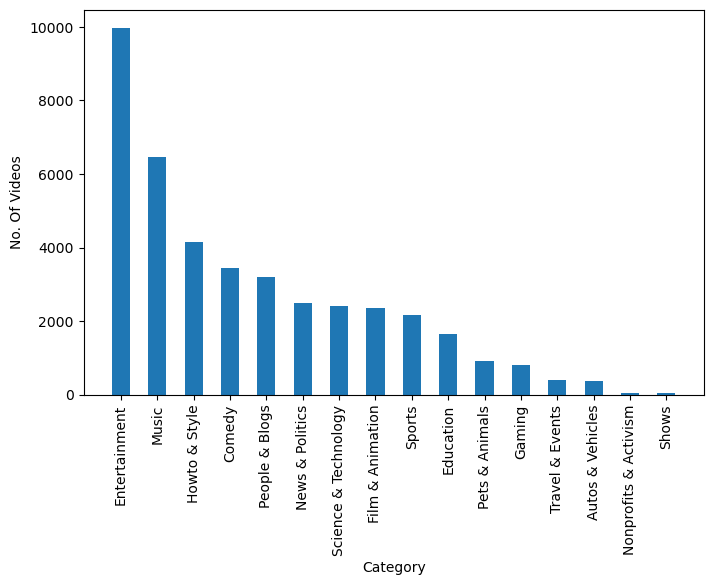

In [58]:
my_dict = (df['category'].value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()),
                     columns = ['Category','No. Of Videos']) 
fig = plt.figure(figsize = (8,5))
plt.bar(count['Category'],count['No. Of Videos'], width=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("No. Of Videos")
plt.show()

In [59]:
#from the above graph, we can see the Entertainment has the largest number of trending videos 
#at approximately 10000. Music and Howto & style are followed. 

In [60]:
#create a new data frame containing only Entertainment category
df_e = df[df.category == 'Entertainment']
df_e

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category
3210,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,last week tonight trump presidency last week t...,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",24,Entertainment
3211,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,rhett and link gmm good mythical morning rhett...,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,24,Entertainment
3212,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,ryan higa higatv nigahiga i dare you idy rhpc ...,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment
3213,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,2017-11-12,24,05:37:17,SNL Saturday Night Live SNL Season 43 Episode ...,2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,24,Entertainment
3214,VifQlJit6A0,2017-11-14,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,2017-11-13,24,03:00:00,The Walking Dead shiva tiger king ezekiel epis...,104578,1576,303,1279,https://i.ytimg.com/vi/VifQlJit6A0/default.jpg,False,False,False,Shiva arrives just in time as King Ezekiel att...,24,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,wI89nVn6LHk,2018-06-14,Maddie Poppe Wins American Idol 2018 - Finale ...,American Idol,2018-05-22,24,04:08:24,ABC americanidol idol american idol ryan seacr...,2003345,19895,2831,3481,https://i.ytimg.com/vi/wI89nVn6LHk/default.jpg,False,False,False,Maddie Poppe the crowd the American Idol 2018 ...,24,Entertainment
13170,tiF9SzzzX_o,2018-06-14,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,2018-05-22,24,02:34:39,the voice season 14 the voice finale performan...,1437051,19930,1794,1671,https://i.ytimg.com/vi/tiF9SzzzX_o/default.jpg,False,False,False,Brynn Cartelli sings Adele's Skyfall during th...,24,Entertainment
13171,Qcj15vHJTtk,2018-06-14,Royal Wedding - SNL,Saturday Night Live,2018-05-20,24,04:58:51,SNL Saturday Night Live SNL Season 43 SNL Epis...,8607264,66559,14179,8382,https://i.ytimg.com/vi/Qcj15vHJTtk/default.jpg,False,False,False,Footage from Prince Harry's (Mikey Day) weddin...,24,Entertainment
13172,_QWZvU7VCn8,2018-06-14,Brad Pitt Bid $120k For A Night With Emilia Cl...,The Graham Norton Show,2018-05-18,24,17:13:08,Graham Norton Graham Norton Show Official Ente...,5564576,46351,2295,2861,https://i.ytimg.com/vi/_QWZvU7VCn8/default.jpg,False,False,False,Check out all that Emilia Clarke merch... Subs...,24,Entertainment


In [61]:
#After analysis of each numerical column and visualization of category distribution, 
#we want to see some correlations between views and likes in the selected category

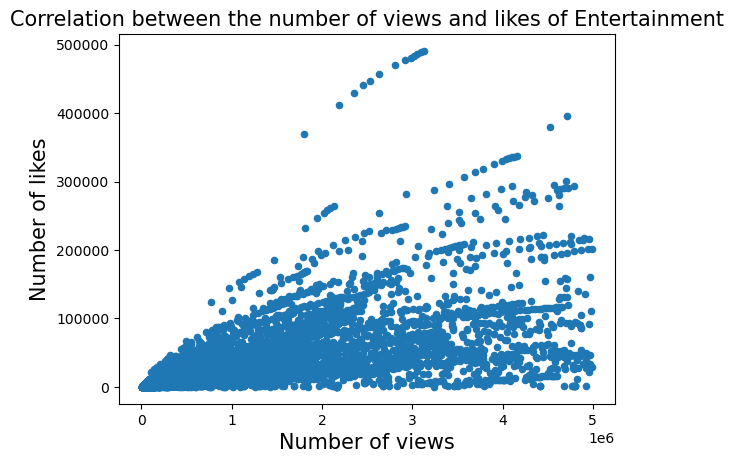

In [62]:
#1. correlation between views and likes of category Entertainment
fig = df_e[df_e['views'] < 5000000].plot.scatter(x = "views", y = "likes")
plt.title('Correlation between the number of views and likes of Entertainment', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of likes', fontsize = 15)
plt.show()
#The plot shows better scatter with dots more spread.

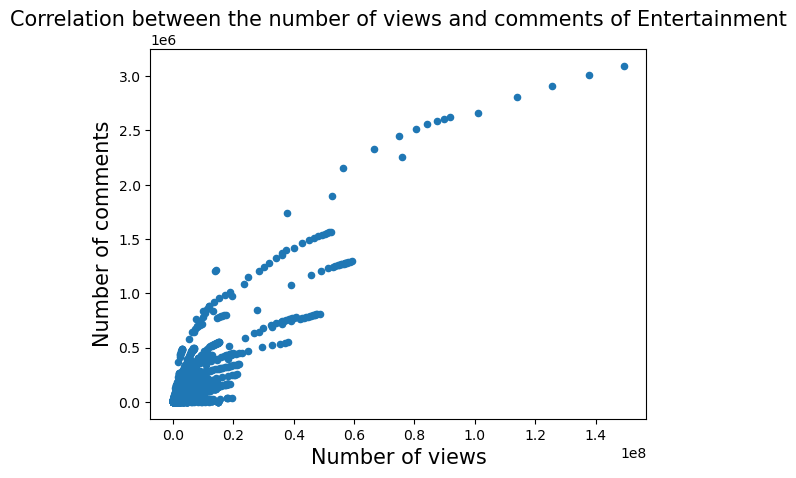

In [63]:
#2. correlation between views and comments of category Entertainment
fig = df_e[df_e['comment_count'] < 5000000].plot.scatter(x = "views", y = "likes")
plt.title('Correlation between the number of views and comments of Entertainment', fontsize = 15)
plt.xlabel('Number of views', fontsize = 15)
plt.ylabel('Number of comments', fontsize = 15)
plt.show()

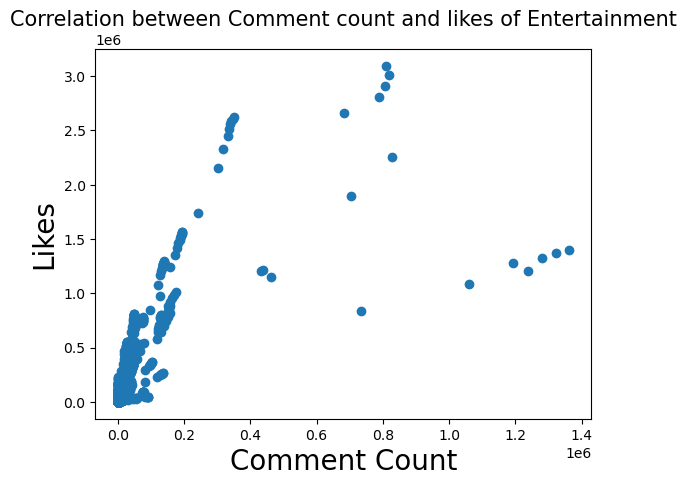

In [64]:
#3. correlation between likes and comments of category Entertainment
fig, ax = plt.subplots()
ax.scatter(df_e['comment_count'], df_e['likes'])
plt.title('Correlation between Comment count and likes of Entertainment', fontsize = 15)
plt.xlabel("Comment Count", size=20)
plt.ylabel("Likes", size=20)
plt.show()

In [65]:
#From above, we noticed there are some linear relationships between:
#the number of views and the number of likes,
#the number of views and the number of comments
#the number of comment counts and the number of likes

In [66]:
#Next, let's look at trending date and see how publish data and pulish time affect the video trend

In [67]:
#first, let's crate a new column indicating what is the day that the video is published
#add a column of what day the video is uploaded
df['publishing_day'] =  pd.to_datetime(df['publish_date']).apply(lambda x: x.strftime('%A'))
df['publishing_day']

0          Monday
1          Friday
2        Saturday
3        Saturday
4        Saturday
           ...   
40944    Thursday
40945    Thursday
40946    Thursday
40947    Thursday
40948    Thursday
Name: publishing_day, Length: 40949, dtype: object

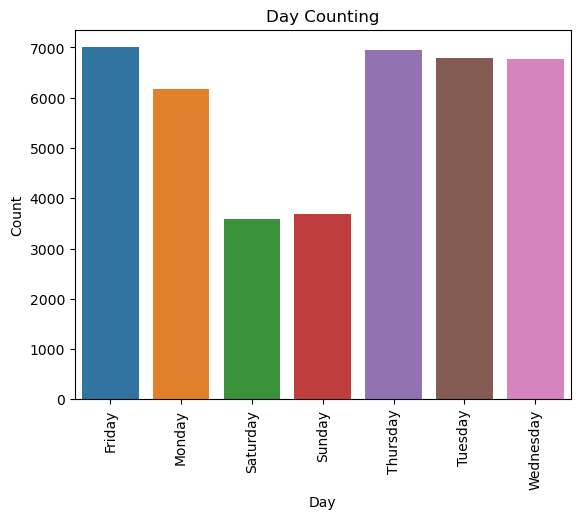

In [68]:
#plot number of videos published corresponding to different day
plt.subplot()
g = sns.countplot( x = 'publishing_day', data=df, order = sorted(df['publishing_day'].unique()))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Day Counting")
g.set_xlabel("Day")
g.set_ylabel("Count")
plt.show()
#we noticed that on Friday, Thursday, Tuesday and Wednesday, the number of trending videos are relatively larger than the other days

In [69]:
#second, let's see what hour the video is published
df[['hour','min','sec']] = df['publish_time'].astype(str).str.split(':', expand=True)
df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category,publishing_day,hour,min,sec
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,Monday,17,13,01
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,22,06:47:32,cute cats thai eggs,98966,2486,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs,Friday,06,47,32
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,22,15:00:03,shawn johnson andrew east shawn east shawn and...,321053,4451,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,Saturday,15,00,03
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,22,18:08:04,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,...,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs,Saturday,18,08,04
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,22,01:19:33,wearing online dollar store makeup for a week ...,2744430,115426,...,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs,Saturday,01,19,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22


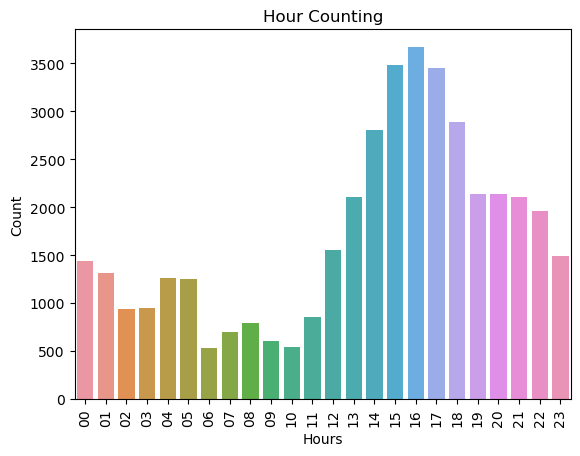

In [70]:
#plot in number of videos published corresponding to hours
plt.subplot()
g = sns.countplot( x = 'hour', data=df, order = sorted(df['hour'].unique()))
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Hour Counting")
g.set_xlabel("Hours")
g.set_ylabel("Count")
plt.show()
#from the plot, we noticed that there are more trending videos published within time interval between 3pm to 6pm

In [71]:
#check the dataset after adding day&ho
df

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category,publishing_day,hour,min,sec
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,Monday,17,13,01
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,22,06:47:32,cute cats thai eggs,98966,2486,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs,Friday,06,47,32
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,22,15:00:03,shawn johnson andrew east shawn east shawn and...,321053,4451,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,Saturday,15,00,03
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,22,18:08:04,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,...,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs,Saturday,18,08,04
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,22,01:19:33,wearing online dollar store makeup for a week ...,2744430,115426,...,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs,Saturday,01,19,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22


In [72]:
##Modeling

In [73]:
#Construct Regression Model for Fraud Check
#Earlier, we've constructed relationship plots and seenwe noticed 
#that there are some obvious linear relationship from the plot between 
#views and likes, dislikes, comment_count.
#However, when we look at the videos where the 'views' are similar 
#while 'likes' varies a lot. For data like this, we want to elinimate such 
#video since it might be a fraud.

In [74]:
#Conduct a fraud check using Regression Modeling 
pred1_df = df
#reduce our data frame containing only columns we need for regression model
pred1_df = pred1_df[['views','likes', 'dislikes','comment_count','id']]
pred1_df

,views,likes,dislikes,comment_count,id
0,748374,57527,2966,15954,22
1,98966,2486,184,532,22
2,321053,4451,1772,895,22
3,197062,7250,217,456,22
4,2744430,115426,1110,6541,22
...,...,...,...,...,...
40944,1324482,22413,608,1644,43
40945,1332252,22461,610,1648,43
40946,1340039,22504,615,1648,43
40947,1345086,22542,615,1649,43


In [75]:
#construct linear regression model and look at their coefficients and intercept
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
cate = pred1_df['id'].unique()

for id in cate:
    #create subset of data for the current category
    category_df = pred1_df[pred1_df['id']==id]
    
    #extract the feathres and target variable
    X = category_df.drop(['views', 'id'],axis=1)
    y = category_df.views
    
    #create linear regression model and fit it to the data
    model = LinearRegression()
    linear = model.fit(X, y)
    
    print(f"id : {id}")
    print("Coefficients:", model.coef_)
    print("Intercept", model.intercept_)

id : 22
Coefficients: [14.48020142 29.3837005  -3.40705488]
Intercept 623058.0547539439
id : 24
Coefficients: [ 39.09421504  50.71498324 -76.69786953]
Intercept 333855.6273569013
id : 23
Coefficients: [ 16.88639886 161.49465353 -23.14934801]
Intercept 236723.97934054933
id : 28
Coefficients: [ 19.31782289 186.55272125 108.94277533]
Intercept -108840.75489326706
id : 1
Coefficients: [ 40.3122196  339.88327424 -84.7372467 ]
Intercept 18460.14403457381
id : 25
Coefficients: [39.20852222 14.08220128 16.95240208]
Intercept 241593.62096871843
id : 17
Coefficients: [ 19.91008673 105.91013384  72.03944184]
Intercept 501806.87019624095
id : 10
Coefficients: [ 22.72020063 400.63350259 -92.3906679 ]
Intercept -152313.38462321553
id : 15
Coefficients: [  17.70618036 1000.67420991  -24.45812364]
Intercept -44552.02898840327
id : 27
Coefficients: [12.5350075  81.67504254 33.8600117 ]
Intercept 162129.64975537767
id : 26
Coefficients: [  6.81902672 501.05246309  -9.22784651]
Intercept 105830.05244171

In [76]:
#construct linear regression model and look at their model summary for each category
import statsmodels.api as sm
from scipy import stats

cate = pred1_df['id'].unique()

for id in cate:
    #create subset of data for the current category
    category_df = pred1_df[pred1_df['id']==id]
    
    #extract the feathres and target variable
    X = category_df.drop(['views', 'id'],axis=1)
    y = category_df.views
    
    X1 = X.to_numpy().astype(int)
    y1 = y.to_numpy().astype(int)
    
    X2 = sm.add_constant(X1)
    est = sm.OLS(y1, X2)
    est2 = est.fit()
    
    print(f"id:{id} {est2.summary()}")

id:22                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     540.9
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          1.97e-284
Time:                        21:35:41   Log-Likelihood:                -52229.
No. Observations:                3210   AIC:                         1.045e+05
Df Residuals:                    3206   BIC:                         1.045e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.231e+05   5.49e+04     11.342   

In [77]:
#From above, for every category except for category 19, p-values all looks good
#and indicates that likes, dislikes, and comments are good predictors of views.
#For category 19, however, the p-value are all greater than 0.05, which means
#we can't reject null for this category.

In [78]:
#From above, we'll exclude category 19 since it contributes to most of the outliers
#Create an adjusted data frame for overall linear regression model
adjusted_df1 = pred1_df.drop(pred1_df[pred1_df['id'] == 19].index)
#perform linear regression for our new adjusted data frame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
X = adjusted_df1.drop(['views', 'id'],axis=1)
y = adjusted_df1.views

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                 random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_predict1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict1.head(10)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("Mean Absolute Error on Testing Set: ", mean_absolute_error(y_test, 
                                                                  y_pred))
print("R-Squared Score on Testing Set: ", r2_score(y_test,y_pred))
#we see the accuracy is still around 79%, which is ok for now. 

Mean Absolute Error on Testing Set:  1181473.4628918546
R-Squared Score on Testing Set:  0.7997958863354226


In [79]:
def vif(data):
    vif_list = []
    for i in range(data.shape[1]):
        y = data[:, i]
        x = np.delete(data, i, axis=1)
        coeffs = np.linalg.lstsq(x, y, rcond=None)[0]
        residuals = y - x @ coeffs
        r2 = 1 - (residuals.var() / y.var())
        vif_value = 1 / (1 - r2)
        vif_list.append(vif_value)
    return vif_list
vif(X1)
#VIF are less than 5, which is good

[2.545346296139949, 1.7337261406313857, 0.7724090665108508]

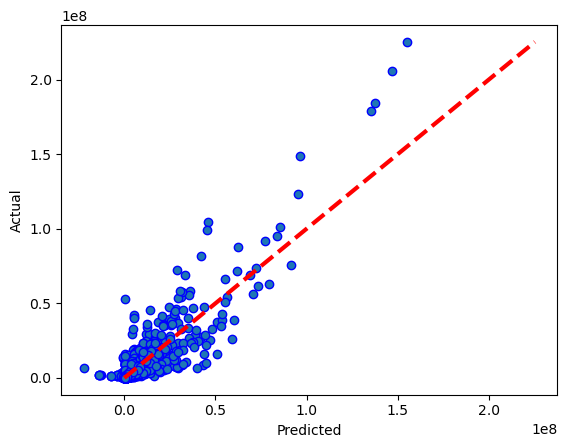

In [80]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [81]:
#look at predicted value and actual value of y
whole_y_pred = model.predict(X)
whole_residuals = y - whole_y_pred
abs_whole_residuals = abs(whole_residuals)
abs_whole_residuals.describe()

count    4.054700e+04
mean     1.208184e+06
std      3.238148e+06
min      2.292257e+01
25%      1.999872e+05
50%      3.319546e+05
75%      9.029568e+05
max      8.720044e+07
Name: views, dtype: float64

In [82]:
#Merge abs_whole_residuals to adjusted_df
adjusted_df2=adjusted_df1
adjusted_df2['abs residual']=abs_whole_residuals
adjusted_df2

,views,likes,dislikes,comment_count,id,abs residual
0,748374,57527,2966,15954,22,2.253505e+05
1,98966,2486,184,532,22,2.089056e+05
2,321053,4451,1772,895,22,1.505451e+05
3,197062,7250,217,456,22,2.888834e+05
4,2744430,115426,1110,6541,22,1.035945e+06
...,...,...,...,...,...,...
40944,1324482,22413,608,1644,43,3.876671e+05
40945,1332252,22461,610,1648,43,3.939708e+05
40946,1340039,22504,615,1648,43,3.998330e+05
40947,1345086,22542,615,1649,43,4.036375e+05


In [83]:
#Use IQR to set boundary and eliminate those views not in the boundary
IQR=902956-199987
lower_bound = 199987 - 1.5*IQR
upper_bound = 902956 + 1.5*IQR

In [84]:
#set boundary
df_checked = adjusted_df2[(adjusted_df2['abs residual'] >= lower_bound) & (adjusted_df2['abs residual'] <= upper_bound)]
df_checked

,views,likes,dislikes,comment_count,id,abs residual
0,748374,57527,2966,15954,22,2.253505e+05
1,98966,2486,184,532,22,2.089056e+05
2,321053,4451,1772,895,22,1.505451e+05
3,197062,7250,217,456,22,2.888834e+05
4,2744430,115426,1110,6541,22,1.035945e+06
...,...,...,...,...,...,...
40944,1324482,22413,608,1644,43,3.876671e+05
40945,1332252,22461,610,1648,43,3.939708e+05
40946,1340039,22504,615,1648,43,3.998330e+05
40947,1345086,22542,615,1649,43,4.036375e+05


In [85]:
new_df = pd.merge(df_checked, df, left_index=True, right_index=True, how='inner')
new_df=new_df.drop(['views_x', 'likes_x','dislikes_x','comment_count_x','id_x','abs residual'], axis = 1)
new_df



,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views_y,likes_y,...,comments_disabled,ratings_disabled,video_error_or_removed,description,id_y,category,publishing_day,hour,min,sec
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,Monday,17,13,01
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,22,06:47:32,cute cats thai eggs,98966,2486,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs,Friday,06,47,32
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,22,15:00:03,shawn johnson andrew east shawn east shawn and...,321053,4451,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,Saturday,15,00,03
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,22,18:08:04,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,...,False,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs,Saturday,18,08,04
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,22,01:19:33,wearing online dollar store makeup for a week ...,2744430,115426,...,False,False,False,I found this online dollar store called ShopMi...,22,People & Blogs,Saturday,01,19,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,...,False,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22


In [86]:
new_df1=new_df.rename(columns={'views_y': 'views', 'likes_y': 'likes', 'dislikes_y': 'dislikes', 'comment_count_y': 'comment_count', 'id_y': 'id'})
new_df1.describe()
#Now we have the new data frame after eliminating the fraud

,trending_date,views,likes,dislikes,comment_count,id
count,35125,3.512500e+04,3.512500e+04,3.512500e+04,3.512500e+04,35125.000000
mean,2018-02-22 20:48:25.417793536,1.066846e+06,3.370953e+04,1.566001e+03,3.806207e+03,20.483616
min,2017-11-14 00:00:00,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,2018-01-01 00:00:00,2.017840e+05,4.453000e+03,1.690000e+02,5.190000e+02,17.000000
50%,2018-02-20 00:00:00,5.288350e+05,1.420300e+04,4.930000e+02,1.462000e+03,24.000000
75%,2018-04-18 00:00:00,1.224274e+06,3.728900e+04,1.316000e+03,3.855000e+03,25.000000
max,2018-06-14 00:00:00,7.870803e+07,2.601283e+06,1.278887e+06,1.238817e+06,43.000000
std,NaN,2.015648e+06,6.781133e+04,9.697628e+03,1.182024e+04,7.401642


In [87]:
#Try Decision Tree model

In [88]:
pred2_df = new_df1
#keep the columns we want
pred2_df = pred2_df[['views','likes', 'dislikes','comment_count']]
pred2_df

,views,likes,dislikes,comment_count
0,748374,57527,2966,15954
1,98966,2486,184,532
2,321053,4451,1772,895
3,197062,7250,217,456
4,2744430,115426,1110,6541
...,...,...,...,...
40944,1324482,22413,608,1644
40945,1332252,22461,610,1648
40946,1340039,22504,615,1648
40947,1345086,22542,615,1649


In [89]:
X=pred2_df[['likes', 'dislikes', 'comment_count']]
y=pred2_df['views']

In [90]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# For regression
model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

In [92]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [93]:
y_pred = model.predict(X_test)

In [94]:
df_predict2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict2.head(10)


,Actual,Predicted
30392,749932,1.164821e+06
18417,972885,6.808708e+05
6198,744262,6.808708e+05
8609,384531,6.808708e+05
6771,541258,6.808708e+05
683,282271,3.566050e+05
24203,278376,6.362765e+05
12963,309069,3.566050e+05
18258,196187,6.808708e+05
31280,3133371,4.616221e+06


In [95]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("Mean Absolute Error on Testing Set: ", mean_absolute_error(y_test, 
                                                                  y_pred))
print("R-Squared Score on Testing Set: ", r2_score(y_test,y_pred))
#better than linear regression model, reaching 85% accuracy

Mean Absolute Error on Testing Set:  432028.7830020161
R-Squared Score on Testing Set:  0.8580522143554451


In [96]:
#from above, we've completed fraud check using regression model

In [97]:
#Next, we want to perform modeling regarding what category to stream the advertisement
#using model AutoRegressive Integrated Moving Average, which is a time series 
#forecasting model that incorporates auto correlation measures to model temporal 
#structure within the time series data to predict future values

In [98]:
pred3_df = new_df1
pred3_df['trending_date'] = pd.to_datetime(pred3_df['trending_date'], format='%y.%d.%m')
pred3_df['publish_date'] = pd.to_datetime(pred3_df['publish_date'])

In [99]:
#add a column of date_to_trend
date_diff = pred3_df

date_diff['date_diff'] = date_diff['trending_date']-date_diff['publish_date']

pred3_df['Days_to_Trend'] = date_diff['date_diff']/np.timedelta64(1,'D')
pred3_df.drop(['date_diff'], axis=1)

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,...,ratings_disabled,video_error_or_removed,description,id,category,publishing_day,hour,min,sec,Days_to_Trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs,Monday,17,13,01,1.0
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21,22,06:47:32,cute cats thai eggs,98966,2486,...,False,False,Kittens come out of the eggs in a Thai commerc...,22,People & Blogs,Friday,06,47,32,207.0
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11,22,15:00:03,shawn johnson andrew east shawn east shawn and...,321053,4451,...,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,Saturday,15,00,03,3.0
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11,22,18:08:04,itsgrace funny comedy vlog grace helbig graceh...,197062,7250,...,False,False,Molly is an god damn amazing human and she cha...,22,People & Blogs,Saturday,18,08,04,3.0
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11,22,01:19:33,wearing online dollar store makeup for a week ...,2744430,115426,...,False,False,I found this online dollar store called ShopMi...,22,People & Blogs,Saturday,01,19,33,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1324482,22413,...,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22,23.0
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1332252,22461,...,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22,24.0
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1340039,22504,...,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22,25.0
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10,43,21:01:22,bleacher report br nba Stan Van Gundy Jeff Van...,1345086,22542,...,False,False,"On an island full of Van Gundys, Stan gets tal...",43,Shows,Thursday,21,01,22,26.0


In [100]:
#keep columns we need for this model
pred3_df = pred3_df[['views','trending_date','publish_date','category_id','Days_to_Trend']]
pred3_df
#pred3_df.isnull().values.any()

,views,trending_date,publish_date,category_id,Days_to_Trend
0,748374,2017-11-14,2017-11-13,22,1.0
1,98966,2017-11-14,2017-04-21,22,207.0
2,321053,2017-11-14,2017-11-11,22,3.0
3,197062,2017-11-14,2017-11-11,22,3.0
4,2744430,2017-11-14,2017-11-11,22,3.0
...,...,...,...,...,...
40944,1324482,2018-06-02,2018-05-10,43,23.0
40945,1332252,2018-06-03,2018-05-10,43,24.0
40946,1340039,2018-06-04,2018-05-10,43,25.0
40947,1345086,2018-06-05,2018-05-10,43,26.0


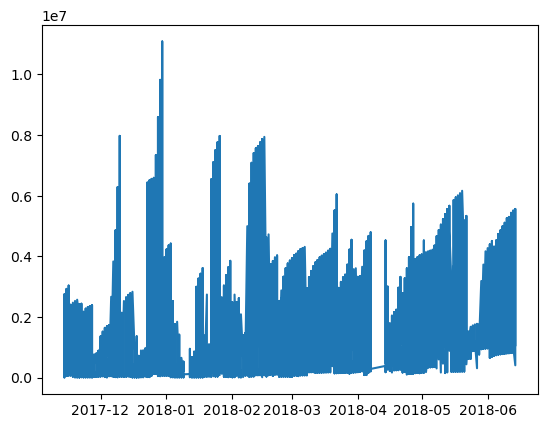

In [117]:
#Plot in date for only one category and see if there's an obvious trend
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import timedelta
#for i in pred3_df.category_id.unique():
#    print (i)  pred3_df[['views', 'trending_date']].set_index('trending_date')

test_df = pred3_df.loc[pred3_df.category_id == '22']
test_ts = test_df[['views', 'trending_date']].set_index('trending_date')
test_ts

plt.plot(test_ts)
plt.show()
#slope_ts1

#showed periodicity (showing trend) and this suggests that the time series is not stationary and 
#will require differencing to make it stationary, at least a difference order of 1.

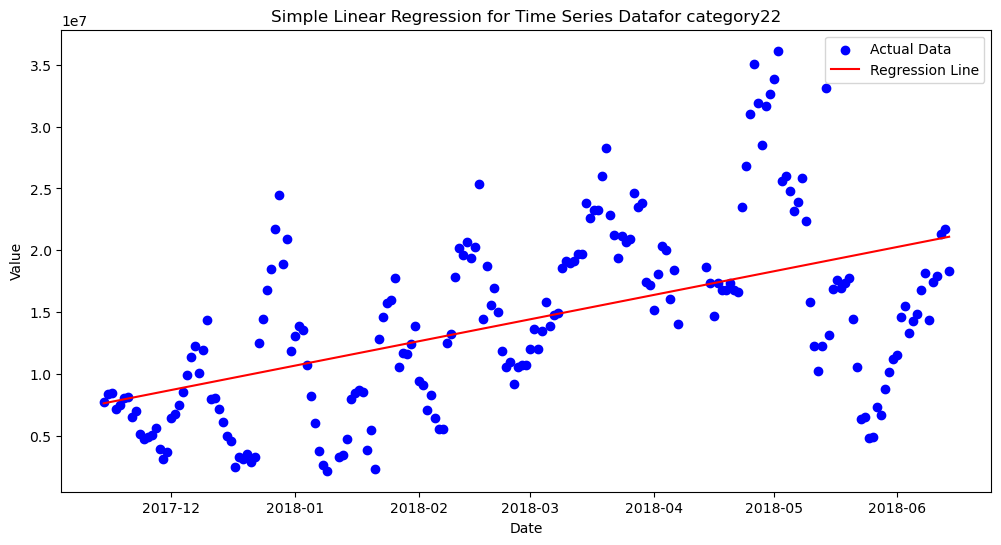

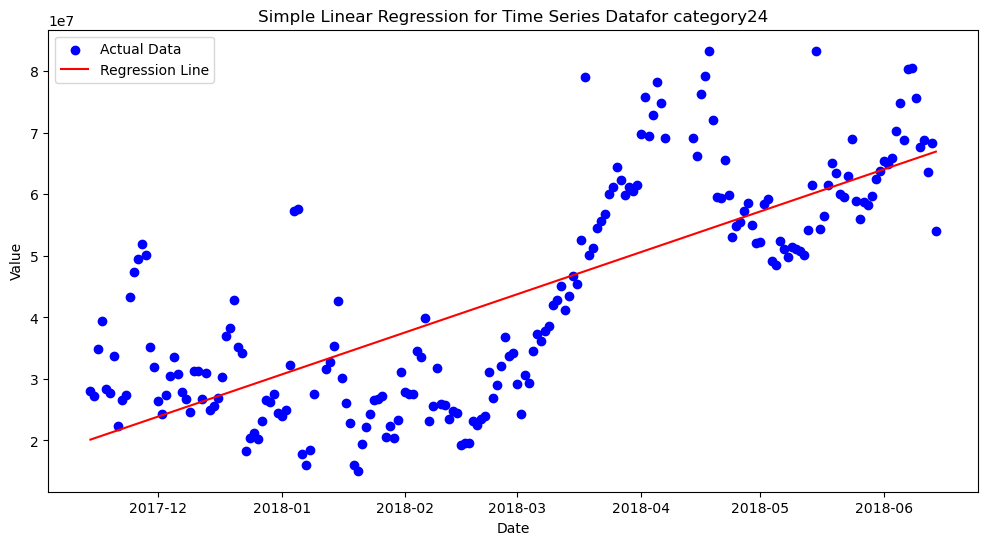

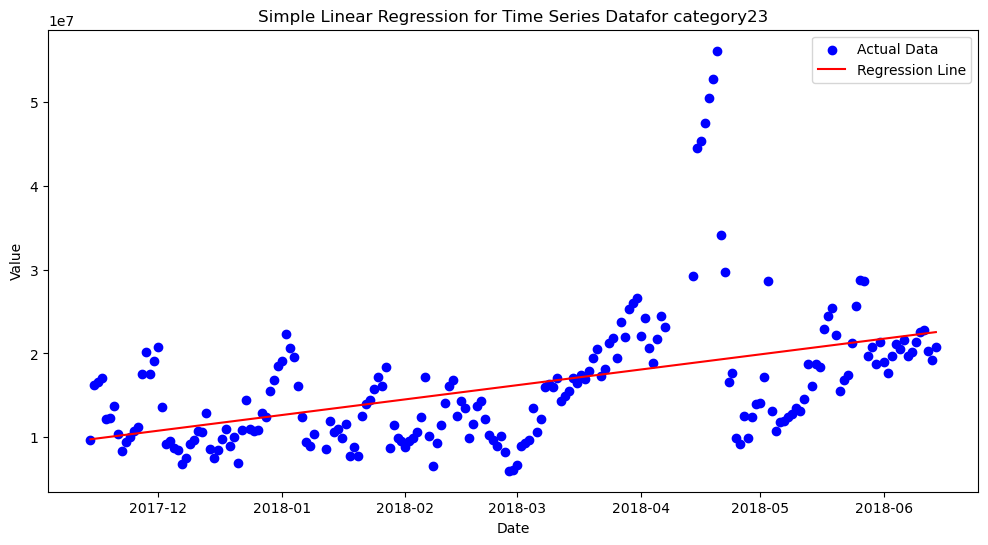

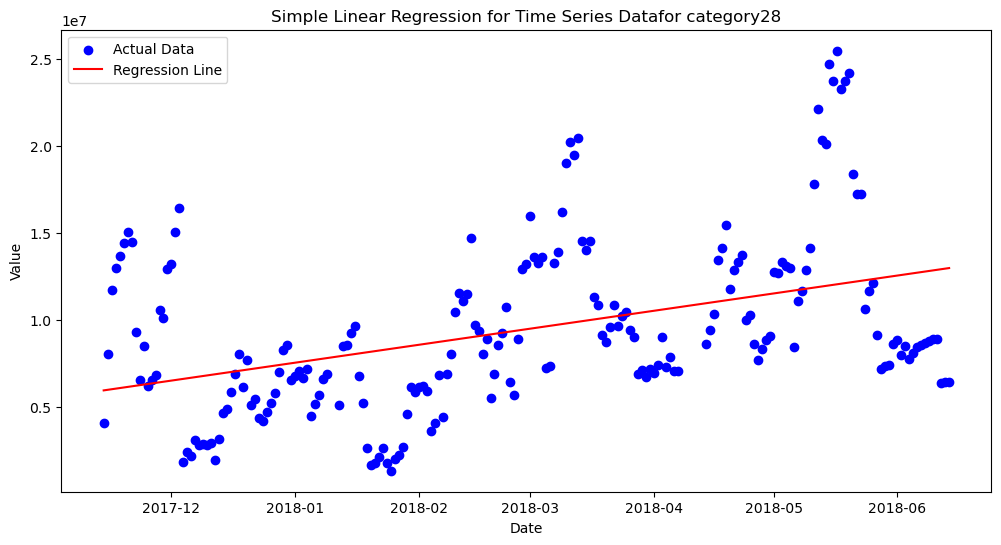

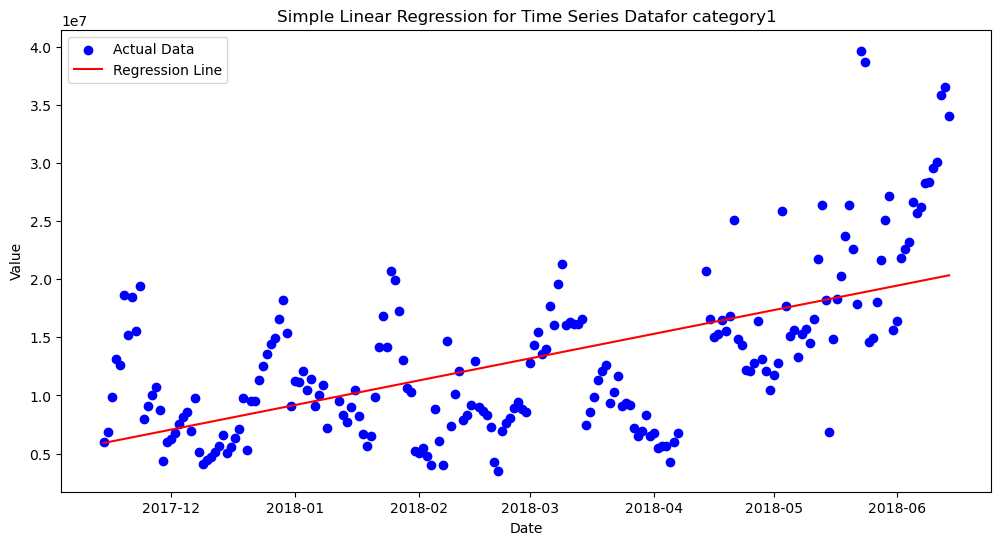

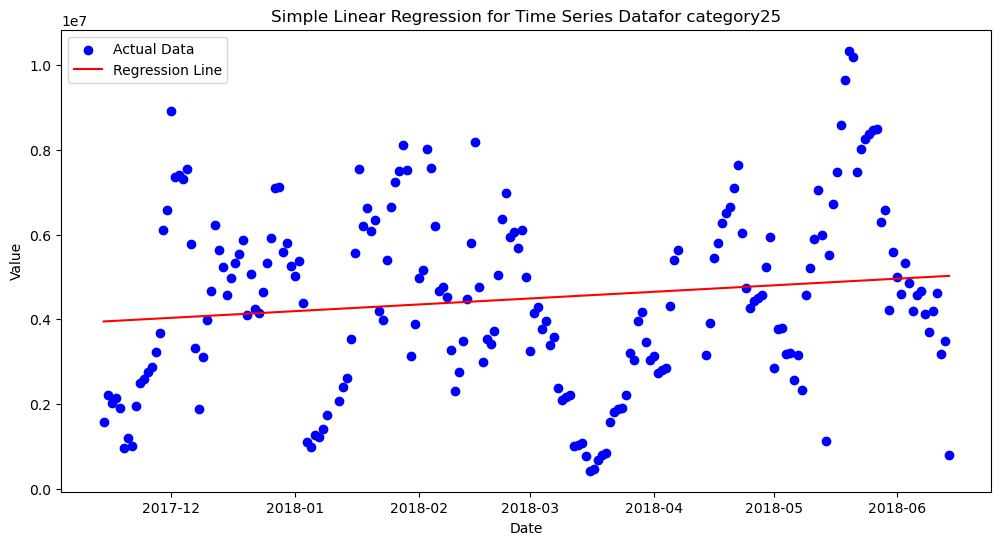

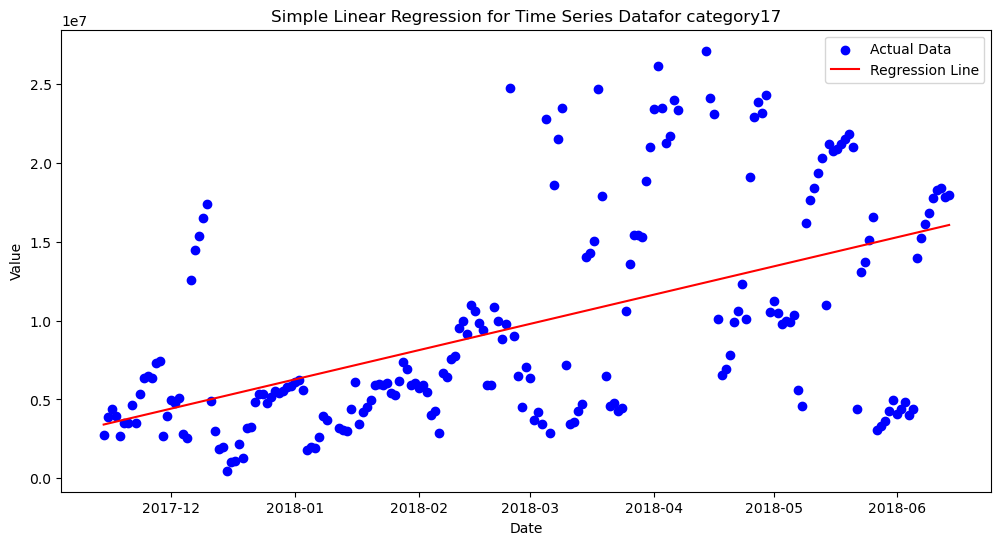

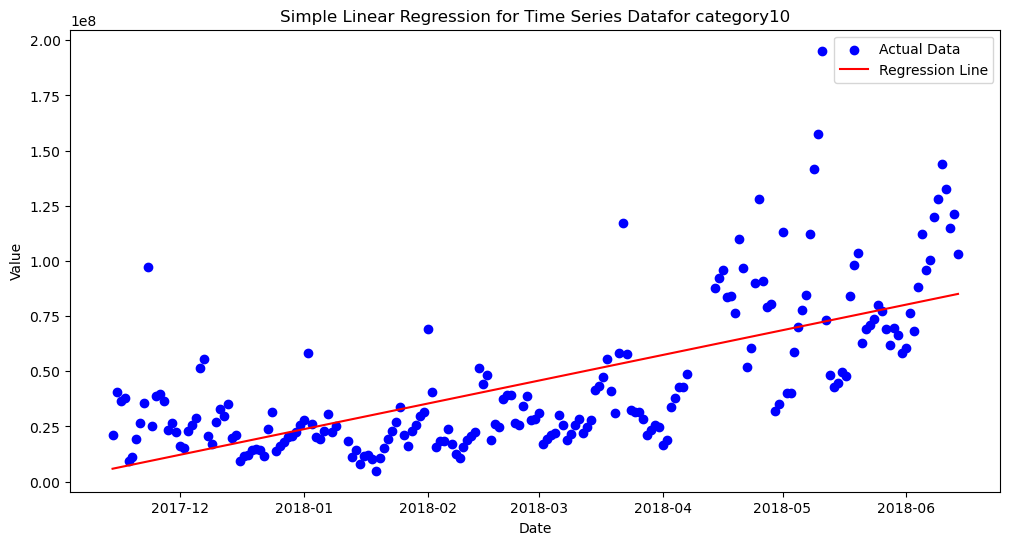

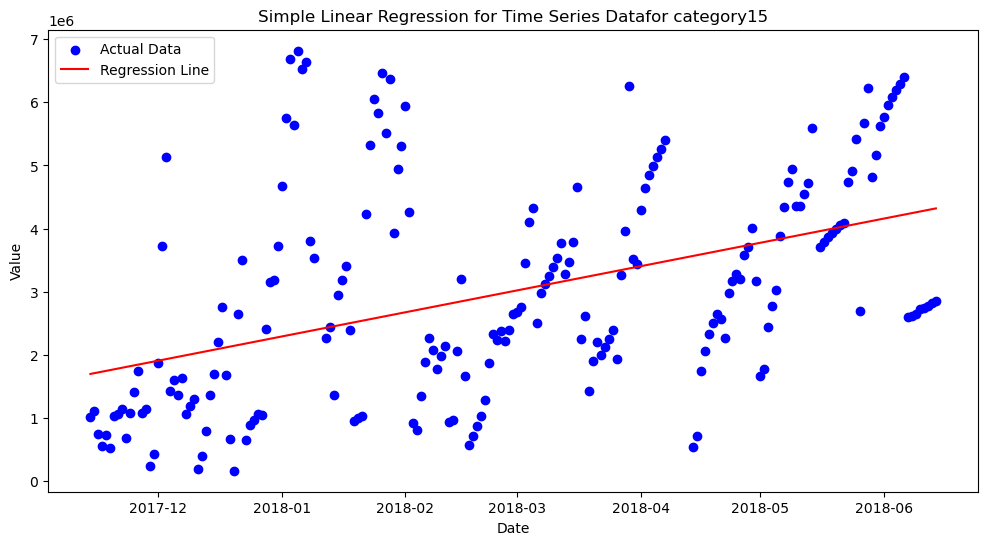

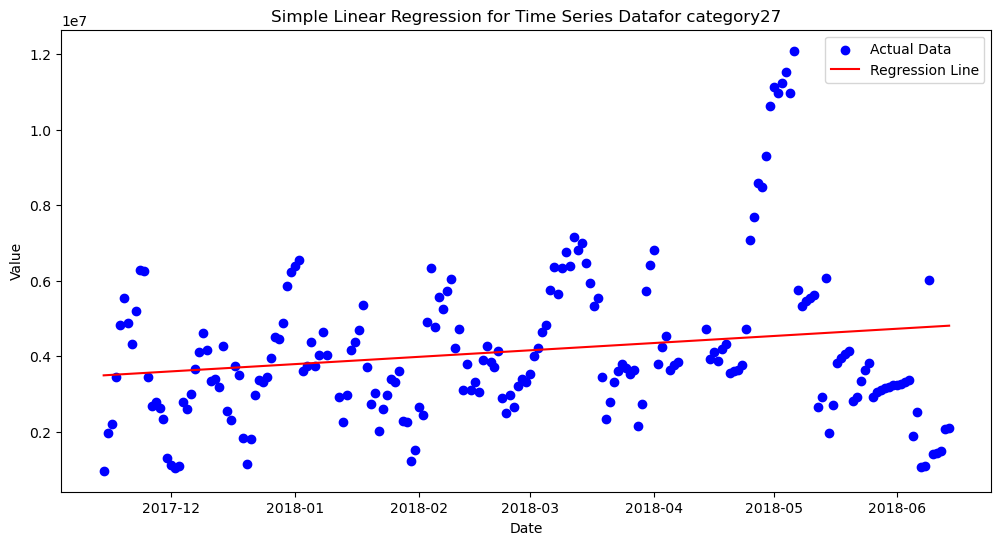

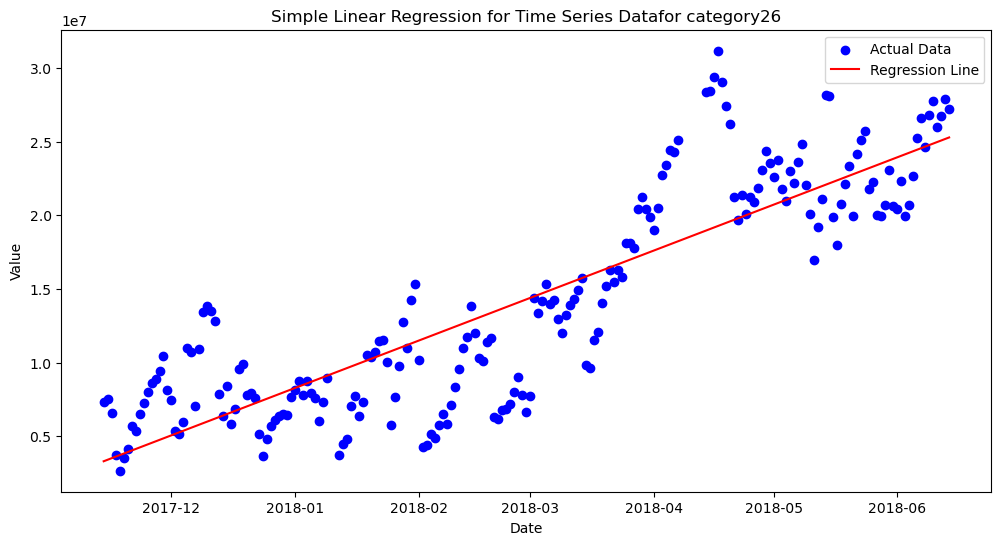

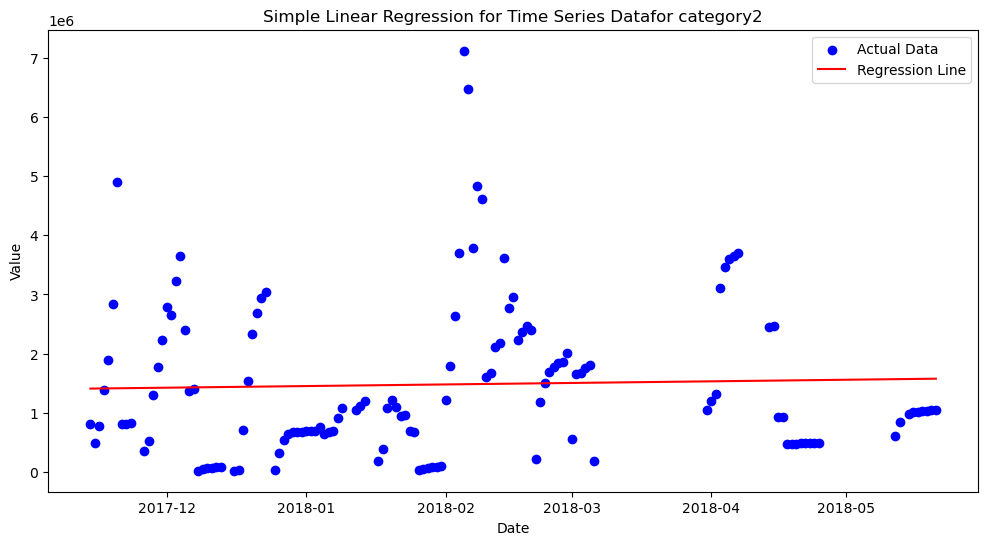

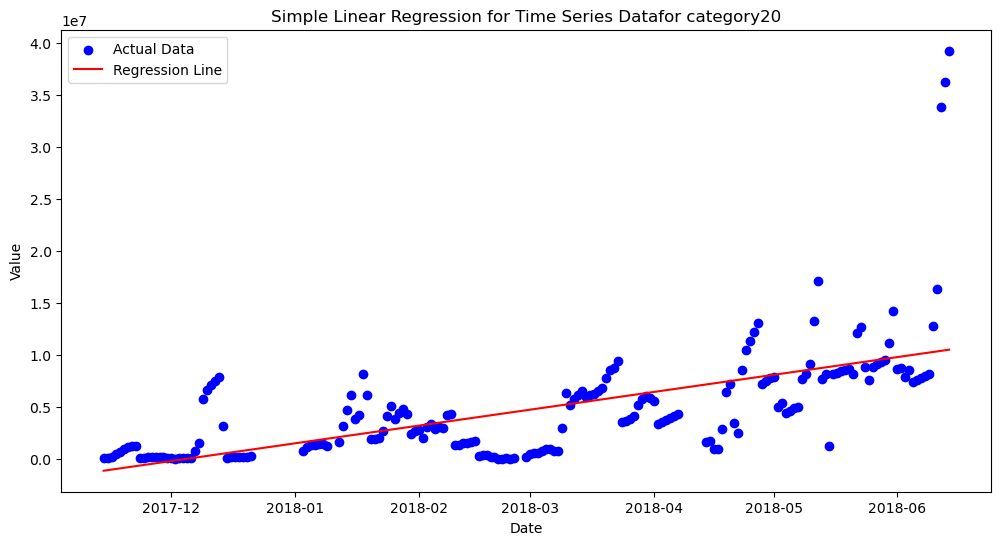

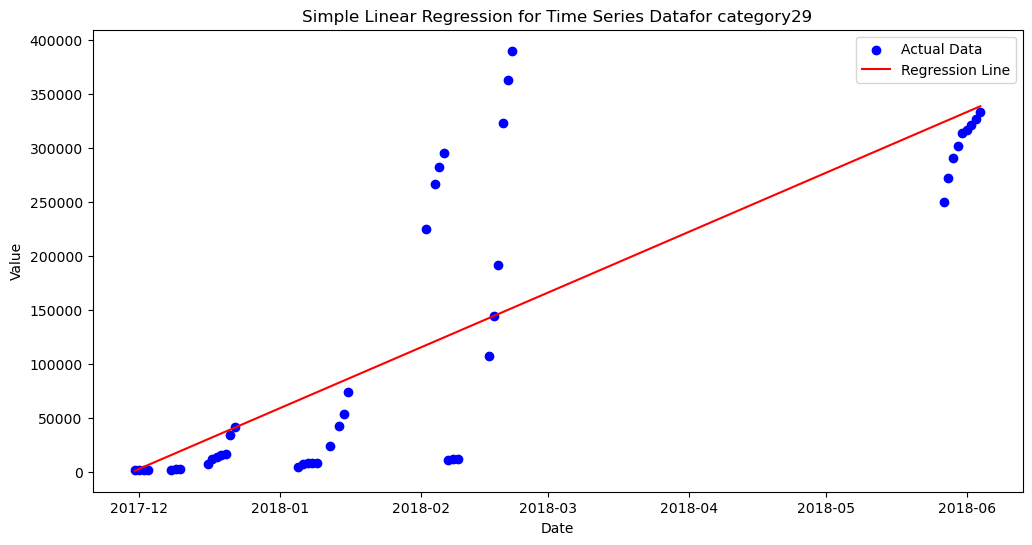

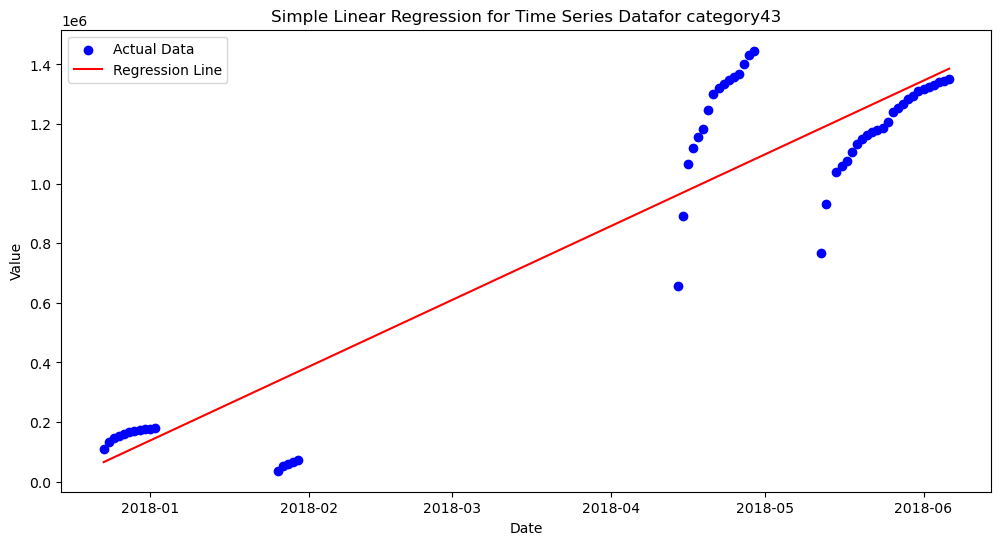

[{'22': 63536.071990873344}, {'24': 220814.93852215426}, {'23': 60354.939393637804}, {'28': 33217.974358996835}, {'1': 68012.81170118818}, {'25': 5079.297107270062}, {'17': 59740.664496884194}, {'10': 373624.56126698974}, {'15': 12373.08049459176}, {'27': 6204.989263410729}, {'26': 103739.46079390304}, {'2': 888.8597756347724}, {'20': 54784.35445919379}, {'29': 1815.5271522270405}, {'43': 8001.014807409871}]


In [120]:
#using linear regression model to find the slope of this time series plot
#for i in pred3_df.category_id.unique():
    #print (i)
list_slope = []
def test_slope(i):
    test_df = pred3_df.loc[pred3_df.category_id == i][['views', 'trending_date']].set_index('trending_date')
    test_slope = test_df.groupby(test_df.index).sum()
    test_slope['x'] = test_slope.index
    X = np.array(test_slope.x.apply(lambda x: x.toordinal())).reshape(-1, 1)
    y = test_slope['views']

    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(X)

    # Plot the original data and the regression line
    plt.figure(figsize=(12, 6))
    plt.scatter(test_slope['x'], y, label='Actual Data', color='blue')
    plt.plot(test_slope['x'], predictions, label='Regression Line', color='red')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Simple Linear Regression for Time Series Data'+'for category'+ i)
    plt.legend()
    plt.show()

    # Print the coefficients
    #print("category", i)
    #print("Intercept:", model.intercept_)
    #print("Coefficient:", model.coef_[0])
    list_slope.append({i:model.coef_[0]}) 
for i in pred3_df.category_id.unique():
    test_slope(i)
print(list_slope)

In [ ]:
#From above, we pick top three categories with greatest coefficients: 10, 24, 26. Bigger the coefficients, faster
#the trending speed. Thus we want to take a closer look at 10, 24, 26

0.12900171276629085


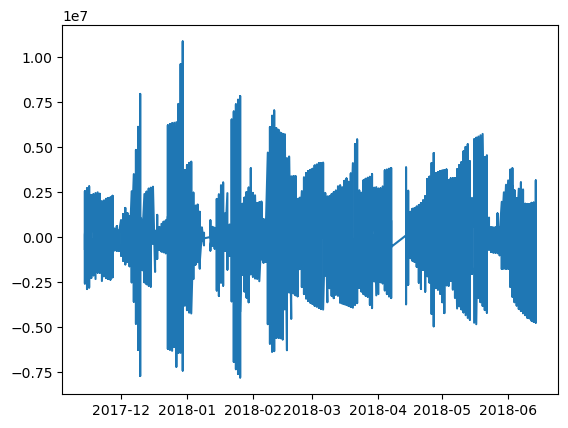

2.1079490850196884e-30


In [113]:
from datetime import datetime
test_train_ts = test_df.loc[(test_df.trending_date >= datetime.strptime('2017-11-01',"%Y-%m-%d")) & (test_df.trending_date <= datetime.strptime('2018-04-30',"%Y-%m-%d"))]
test_test_ts = test_df.loc[(test_df.trending_date >= datetime.strptime('2018-05-01',"%Y-%m-%d")) & (test_df.trending_date <= datetime.strptime('2018-06-30',"%Y-%m-%d"))]

from statsmodels.tsa.stattools import adfuller
test_model = test_train_ts[['views', 'trending_date']].set_index('trending_date')
result = adfuller(test_model)
print(result[1])#p value is greater than 0.05, cannot reject null

plt.plot(test_ts.diff())
plt.show()

from statsmodels.graphics.tsaplots import plot_acf

result = adfuller(test_model.diff().dropna())
print(result[1])#the p-value is less than 0.05, can reject null, stationary data

In [114]:
model = ARIMA(test_model, order = (1,1,1))
model_fit = model.fit()
model

/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [115]:
predictions = model_fit.forecast(steps=11)
predictions = pd.Series(predictions)
predictions

/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jennyzhu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2517    1.286899e+06
2518    1.368015e+06
2519    1.365175e+06
2520    1.365274e+06
2521    1.365270e+06
2522    1.365271e+06
2523    1.365271e+06
2524    1.365271e+06
2525    1.365271e+06
2526    1.365271e+06
2527    1.365271e+06
Name: predicted_mean, dtype: float64

In [116]:
rmse=np.sqrt(mean_squared_error(test_ts, predictions))
print('Test RMSE: %.3f' % rmse)

ValueError: Found input variables with inconsistent numbers of samples: [2925, 11]

In [ ]:
#Now we want to do some analysis on descriptive columns